<a href="https://colab.research.google.com/github/mburu-mwangi/titanic-dataset/blob/main/Moringa_Data_Science_Core_W9_Independent_Project_2021_10_Alfonce_Mwangi_Python_KNN_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Defining the Question

Predicting the survival of passengers who boarded the titanic ship 

### a) Specifying the Data Analytic Question



### b) Defining the Metric for Success

### c) Understanding the context 

### d) Recording the Experimental Design

### e) Data Relevance

## 2. Reading the Data

### Importing the necessary libraries


In [90]:
# aiding in analysis and visualization
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# # Feature Engineering ,Preprocessing and Modeling
# from statsmodels.stats.outliers_influence import variance_inflation_factor
# from sklearn.model_selection import train_test_split,GridSearchCV
# from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

### Reading the train dataset.

In [91]:
# Loading the Data from the source
# 
df_1 = pd.read_csv('https://archive.org/download/train5_202002/train%20%285%29.csv')
df_1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Reading the test dataset.

In [92]:
# Loading the Data from the source
# 
df_2 = pd.read_csv('https://archive.org/download/test1_202002/test%20%281%29.csv')
df_2.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S




## 3. Checking the Data

### train dataset


In [93]:
# Determining the no. of records and features in the dataset
#
print('This dataset contains',df_1.shape[0], 'rows and',df_1.shape[1],'columns' )

This dataset contains 891 rows and 12 columns


In [94]:
# Previewing the top of our dataset
#
df_1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [95]:
# Previewing the bottom of our dataset
# 
df_1.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [96]:
# Checking whether each column has an appropriate datatype
#
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### test dataset

In [97]:
# Determining the no. of records and features in the dataset
#
print('This dataset contains',df_2.shape[0], 'rows and',df_2.shape[1],'columns' )

This dataset contains 418 rows and 11 columns


In [98]:
# Previewing the top of our dataset
#
df_2.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [99]:
# Previewing the bottom of our dataset
# 
df_2.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [100]:
# Checking whether each column has an appropriate datatype
#
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


## 4. External Data Source Validation

## 5. Tidying the Dataset

### train dataset

In [101]:
df_1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [102]:
# dropping the unnecessary columns
#
df_1.drop(['Name','Ticket','Cabin'],axis=1,inplace=True)

In [103]:
df_1.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [104]:
# Checking for Outliers
#
print(df_1['SibSp'].unique())
print('\n')
print(df_1['Parch'].unique())
print('\n')
print(df_1['Sex'].unique())
print('\n')
print(df_1['Embarked'].unique())
print('\n')
print(df_1['Survived'].unique())
print('\n')
print(df_1['Pclass'].unique())

[1 0 3 4 2 5 8]


[0 1 2 5 3 4 6]


['male' 'female']


['S' 'C' 'Q' nan]


[0 1]


[3 1 2]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


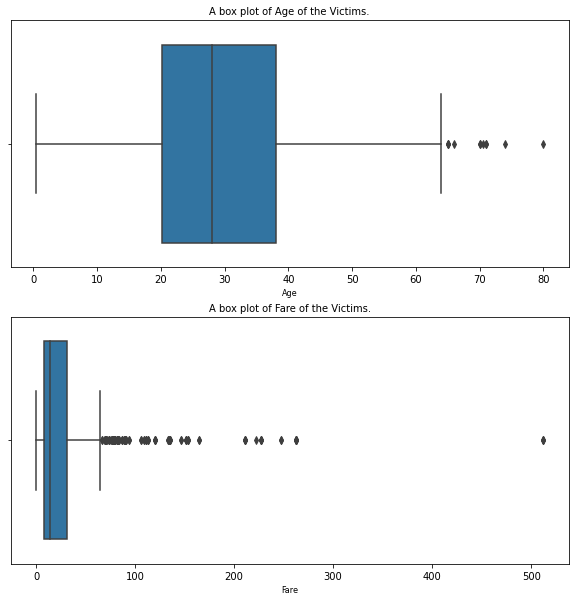

In [105]:
# Checking for Anomalies
#
cols = ['Age','Fare']
fig,ax=plt.subplots(len(cols),figsize=(10,10))
# 
for i, col_vals in enumerate(cols):
  sns.boxplot(df_1[col_vals],ax=ax[i])
  ax[i].set_title('A box plot of '+col_vals+ ' of the Victims.',fontsize=10)
  ax[i].set_xlabel(col_vals,fontsize=8)
plt.show()

I will not remove the outliers as shown in the boxplots above. Since the data will lack important details.

In [106]:
# Identifying the Missing Data
#
df_1.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

In [113]:
print(df_1.groupby(['Pclass','Sex'])['Age'].median())

Pclass  Sex   
1       female    35.0
        male      40.0
2       female    28.0
        male      30.0
3       female    21.5
        male      25.0
Name: Age, dtype: float64


In [114]:
# Dealing with the Missing Data
#
# Filling with the median age based on the sex and the class of the victim
#
df_1['Age'] = df_1.groupby(['Pclass','Sex'])['Age'].apply(lambda x: x.fillna(x.median()))

In [117]:
# As for the Embarked column
#
df_1['Embarked']= df_1.apply(lambda y: y.fillna(y.mode()))



In [120]:
df_1.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Sex            False
Age            False
SibSp          False
Parch          False
Fare           False
Embarked       False
dtype: bool

In [122]:
# Checking for duplicates
#
df_1.duplicated().sum()

0

### test dataset

In [124]:
df_2.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [125]:
# dropping the unnecessary columns
#
df_2.drop(['Name','Ticket','Cabin'],axis=1,inplace=True)

In [126]:
df_1.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,1
1,2,1,1,female,38.0,1,0,71.2833,2
2,3,1,3,female,26.0,0,0,7.9250,3
3,4,1,1,female,35.0,1,0,53.1000,4
4,5,0,3,male,35.0,0,0,8.0500,5


In [128]:
# Checking for Outliers
#
print(df_2['SibSp'].unique())
print('\n')
print(df_2['Parch'].unique())
print('\n')
print(df_2['Sex'].unique())
print('\n')
print(df_2['Embarked'].unique())
print('\n')
print(df_2['Pclass'].unique())

[0 1 2 3 4 5 8]


[0 1 3 2 4 6 5 9]


['male' 'female']


['Q' 'S' 'C']


[3 2 1]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


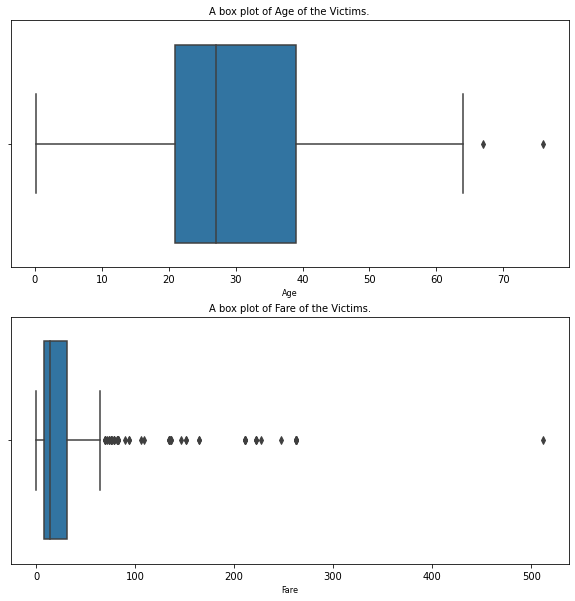

In [129]:
# Checking for Anomalies
#
cols = ['Age','Fare']
fig,ax=plt.subplots(len(cols),figsize=(10,10))
 
for i, col_vals in enumerate(cols):
  sns.boxplot(df_2[col_vals],ax=ax[i])
  ax[i].set_title('A box plot of '+col_vals+ ' of the Victims.',fontsize=10)
  ax[i].set_xlabel(col_vals,fontsize=8)
plt.show()

I will not remove the outliers as shown in the boxplots above. Since the data will lack important details.

In [130]:
# Identifying the Missing Data
#
df_2.isnull().sum()

PassengerId     0
Pclass          0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
Embarked        0
dtype: int64

In [131]:
# Dealing with the Missing Data

# Filling with the median age based on the sex and the class of the victim
#
df_2['Age'] = df_2.groupby(['Pclass','Sex'])['Age'].apply(lambda x: x.fillna(x.median()))

In [132]:
# As for the Fare column
#
df_2.loc[df_2['Fare'].isnull()]



,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
152,1044,3,male,60.5,0,0,NaN,S


In [136]:
# Replacing the null value with the median of entries with the same inputs
#
Fare_rep_null = df_2.loc[(df_2['Pclass']==3) & (df_2['SibSp']==0) & (df_2['Parch']==0) & (df_2['Embarked']=='S')]['Fare'].median()
print(Fare_rep_null)
df_2.loc[df_2['Fare'].isnull()] = Fare_rep_null

7.8958


In [137]:
df_2.isnull().any()

PassengerId    False
Pclass         False
Sex            False
Age            False
SibSp          False
Parch          False
Fare           False
Embarked       False
dtype: bool

In [138]:
# Checking for duplicates
#
df_2.duplicated().sum()

0

## 6. Exploratory Analysis

I will be using the train dataset for analysis

### Univariate Analysis

In [150]:
df_1.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked'],
      dtype='object')

In [167]:
# Visualising the Victims who survived and those who did not
#
def univariate(df,var_1):
  sns.set_style('darkgrid')
  bar, ax = plt.subplots(figsize=(10,10))
  ax=sns.countplot(x=f"{var_1}",data=df)
  ax.set_title(f"{var_1} victims")
  ax.set_xlabel(f"{var_1}",fontsize=16)
  ax.set_ylabel("Count",fontsize=16)
  plt.show()
  
  return



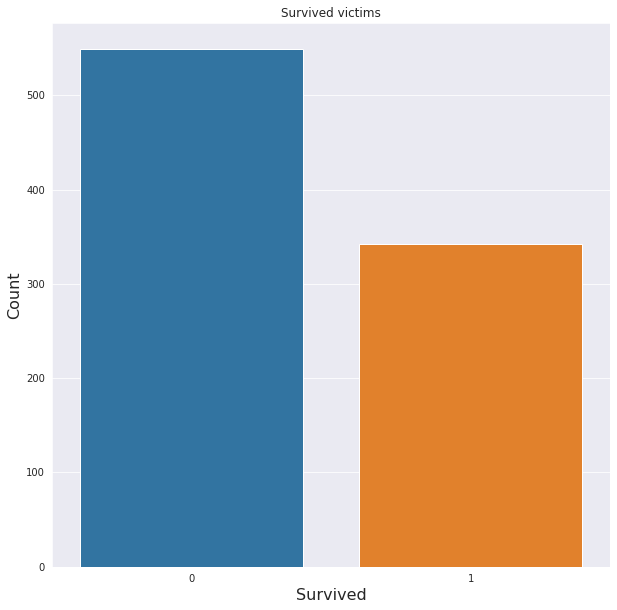

In [169]:
# Visualising the Victims who survived and those who did not
#
univariate(df_1,'Survived')

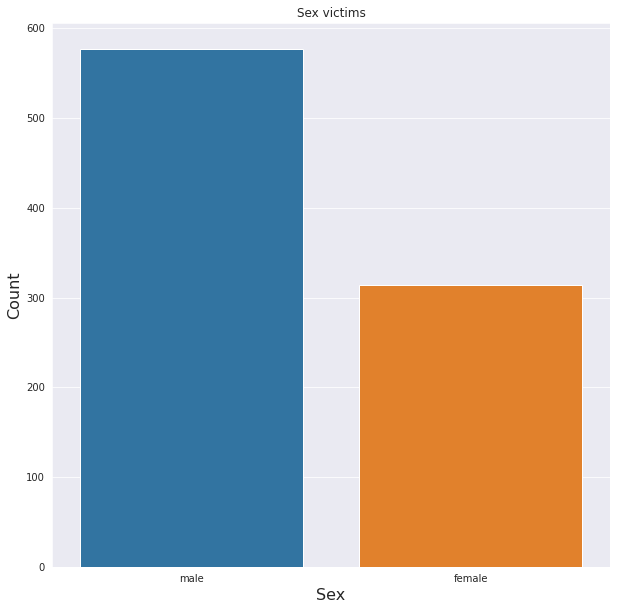

In [175]:
# Visualising the general count of the sex of the victims
#
univariate(df_1,'Sex')

From the univariate analysis, I can deduce that:
* More people died from the dataset given
* Most people who boarded the boat were male

### Bivariate Analysis

In [182]:
# 
#
def bivariate(df,var_1,var_2):
  sns.set_style('darkgrid')
  bar, ax = plt.subplots(figsize=(10,10))
  ax=sns.countplot(x=f"{var_1}",hue = f"{var_2}",data=df)
  ax.set_title(f"{var_1} victims")
  ax.set_xlabel(f"{var_1}",fontsize=16)
  ax.set_ylabel("Count",fontsize=16)
  plt.show()
  return 

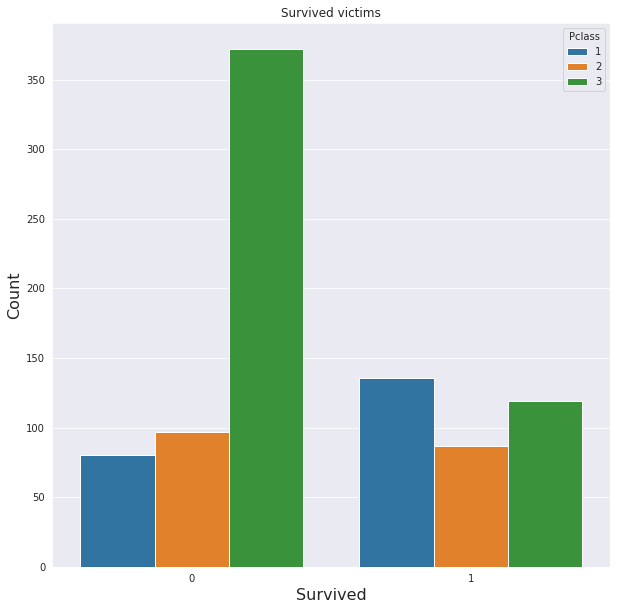

In [184]:
# Visualising the comparison of 
bivariate(df_1,'Survived','Pclass',)

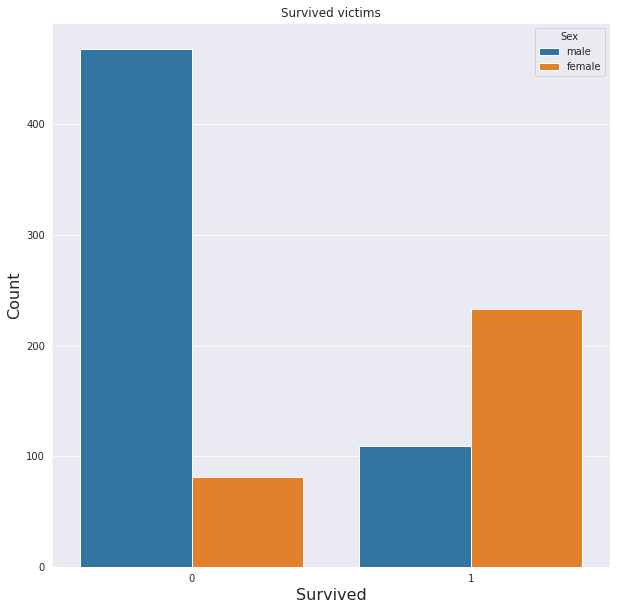

In [185]:
# visualising the survived victims based on sex
#
bivariate(df_1,'Survived','Sex')

From the bivariate analysis, i can deduce that:
* Most People from third class cabins died
* Most Males generally died and most females survived.

### Feature Engineering

#### *train set*


In [190]:
categorical_data = [col for col in df_1  if df_1[col].dtypes == 'O']
print(categorical_data)

['Sex', 'Embarked']


#### *test set*

## 7. Implementing the Solution

In [ ]:
# Implementing the Solution
# 

## 8. Challenging the solution

> The easy solution is nice because it is, well, easy, but you should never allow those results to hold the day. You should always be thinking of ways to challenge the results, especially if those results comport with your prior expectation.






In [ ]:
# Reviewing the Solution 
#

## 9. Follow up questions

> At this point, we can refine our question or collect new data, all in an iterative process to get at the truth.



### a). Did we have the right data?

### b). Do we need other data to answer our question?

### c). Did we have the right question?